In [2]:
from selenium import webdriver

import time
import numpy as np
import pandas as pd
import tabula

from bs4 import BeautifulSoup
import urllib.request as req

import requests
import os
import glob
import datetime
import re

import io

In [205]:
# sex = 'men'
# country = ['JPN', 'ROC', 'ARG', 'BRA', 'FRA', 'CAN', 'IRI', 'VEN', 'ITA', 'POL', 'TUN', 'USA']
# colors = ['red', 'darkblue', 'aqua', 'seagreen', 'orange', 'tomato', 'maroon', 'yellow', 'lawngreen', 'brown', 'coral', 'navy']
sex = 'women'
country = ['JPN', 'KOR', 'SRB', 'BRA', 'USA', 'DOM', 'KEN', 'ARG', 'TUR', 'CHN', 'ITA', 'ROC']
colors = ['hotpink', 'black', 'indigo', 'seagreen', 'navy', 'orange', 'maroon', 'aqua', 'salmon', 'red', 'lawngreen', 'grey']

In [206]:
# select = glob.glob('men/stats/*JPN*JPN*Block*.csv')
statsList = []
# print(select)
for i in range(len(country)):
#     print(country[i])
    stats = pd.DataFrame()
    select = glob.glob('{0}/stats/*{1}*{1}*Block*.csv'.format(sex, country[i]))
    dfs = []
    for j in range(len(select)):
        df = pd.read_csv(select[j]) 
        df['In-Play'] = df['In-Play'].replace('-', '').replace('', np.nan).astype(float)
        df['Total Attempts'] = df['Total Attempts'].replace(' ', np.nan).astype(float)
    #     df = df.drop(columns={'Total Attempts'})
        df['Set'] = round(df.loc[0, 'Points'] / df.loc[0, 'by Set'])
#         print(df.head(3))
        dfs.append(df)
    stats = pd.concat(dfs)
    stats = stats.groupby('Name').sum()
    stats['by Set'] = round(stats['Points'] / stats['Set'], 2)
    stats['Effort'] = round((stats['Points'] + stats['In-Play'] * 0.5 + stats['Errors'] * 0.1) / stats['Set'], 2)
#     print(stats.head(1))
    stats['Country'] = country[i]
    stats.to_csv('{}/skill/Block_{}.csv'.format(sex, country[i]))
    statsList.append(stats)
allstats = pd.concat(statsList)
allstats.to_csv('{}/skill/BlockAll.csv'.format(sex))

In [207]:
dfs = []
for j in range(len(select)):
    df = pd.read_csv(select[j])
    df['Country'] = country[2] 
    df['In-Play'] = df['In-Play'].replace('-', np.nan).astype(float)
    df['Total Attempts'] = df['Total Attempts'].replace(' ', np.nan).astype(float)
#     df = df.drop(columns={'Total Attempts'})
    df['Set'] = round(df.loc[0, 'Points'] / df.loc[0, 'by Set'])
#     print(df.head(15))
    dfs.append(df)

In [208]:
stats = pd.concat(dfs)
stats = stats.groupby('Name').sum()
stats['by Set'] = round(stats['Points'] / stats['Set'],2)
stats['Effort'] = round((stats['Points'] + stats['In-Play'] * 0.5 + stats['Errors'] * 0.1) / stats['Set'], 2)

In [209]:
allstats = pd.read_csv('{}/skill/BlockAll.csv'.format(sex))
allstats['In-Play by Set'] = round(allstats['In-Play'] / allstats['Set'], 2)
allstats

,Name,Points,Errors,In-Play,Total Attempts,by Set,Set,Effort,Country,In-Play by Set
0,ARAKI Erika,7.0,18.0,29.0,54.0,0.39,18,1.29,JPN,1.61
1,HAYASHI Kotona,0.0,3.0,9.0,12.0,0.00,18,0.27,JPN,0.50
2,ISHII Yuki,0.0,2.0,5.0,7.0,0.00,18,0.15,JPN,0.28
3,ISHIKAWA Mayu,3.0,11.0,17.0,31.0,0.17,18,0.70,JPN,0.94
4,KOBATA Mako,0.0,0.0,1.0,1.0,0.00,18,0.03,JPN,0.06
...,...,...,...,...,...,...,...,...,...,...
139,PILIPENKO Daria,0.0,0.0,0.0,0.0,0.00,23,0.00,ROC,0.00
140,PODKOPAEVA Anna,0.0,0.0,0.0,0.0,0.00,23,0.00,ROC,0.00
141,SMIRNOVA Kseniia,1.0,1.0,0.0,2.0,0.04,23,0.05,ROC,0.00
142,STARTSEVA Evgeniya,5.0,18.0,32.0,55.0,0.22,23,0.99,ROC,1.39


In [210]:
# allstats.sort_values(by='In-Play by Set', ascending=False).head(10)
allstats.sort_values(by='by Set', ascending=False).head(10)

,Name,Points,Errors,In-Play,Total Attempts,by Set,Set,Effort,Country,In-Play by Set
103,GUNES Zehra,29.0,35.0,56.0,120.0,1.16,25,2.42,TUR,2.24
136,KOROLEVA Irina,20.0,29.0,41.0,90.0,0.87,23,1.89,ROC,1.78
46,da SILVA Ana Carolina,23.0,49.0,39.0,111.0,0.82,28,1.69,BRA,1.39
47,de OLIVEIRA SAAD GATTAZ Caroline,22.0,35.0,55.0,112.0,0.79,28,1.89,BRA,1.96
48,AKINRADEWO Foluke,21.0,32.0,34.0,87.0,0.75,28,1.47,USA,1.21
134,FETISOVA Irina,17.0,30.0,32.0,79.0,0.74,23,1.57,ROC,1.39
33,POPOVIC Mina,18.0,35.0,42.0,95.0,0.72,25,1.70,SRB,1.68
102,ERDEM DUNDAR Eda,18.0,30.0,48.0,96.0,0.72,25,1.80,TUR,1.92
58,WASHINGTON Haleigh,20.0,33.0,42.0,95.0,0.71,28,1.58,USA,1.50
67,MARTINEZ Jineiry,16.0,15.0,34.0,65.0,0.70,23,1.50,DOM,1.48


In [211]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(allstats.loc[:, 'by Set'], allstats.loc[:, 'In-Play by Set'])

# ax.set_xlabel =
# fig.show()

SyntaxError: invalid syntax (<ipython-input-211-6ed9c32bf879>, line 7)

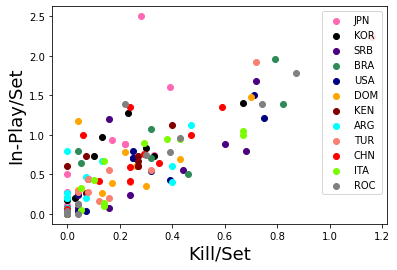

In [212]:
# fig = plt.figure()
import matplotlib.cm as cm 

for c,color in zip(country, colors):
    stats = pd.read_csv('{}/skill/Block_{}.csv'.format(sex, c))
    stats['In-Play by Set'] = round(stats['In-Play'] / stats['Set'], 2)
#     stats
    plt.scatter(stats.loc[:, 'by Set'], stats.loc[:, 'In-Play by Set'], color=color, label=c)
plt.legend()
plt.xlabel('Kill/Set', fontsize=18)
plt.ylabel('In-Play/Set', fontsize=18)
plt.show()

In [213]:
teamstats = allstats.groupby('Country').sum()
teammax = allstats.groupby('Country').max()
teamstats['Set'] = teammax['Set']
teamstats['by Set'] = round(teamstats['Points'] / teamstats['Set'], 2)
teamstats['In-Play by Set'] = round(teamstats['In-Play'] / teamstats['Set'], 2)
teamstats

,Points,Errors,In-Play,Total Attempts,by Set,Set,Effort,In-Play by Set
Country,,,,,,,,
ARG,23.0,81.0,75.0,179.0,1.53,15,4.56,5.00
BRA,83.0,171.0,204.0,458.0,2.96,28,7.37,7.29
CHN,44.0,126.0,129.0,299.0,2.59,17,7.12,7.59
DOM,53.0,111.0,139.0,303.0,2.30,23,5.81,6.04
ITA,64.0,123.0,138.0,325.0,3.05,21,6.91,6.57
JPN,27.0,84.0,149.0,260.0,1.50,18,6.37,8.28
KEN,24.0,63.0,80.0,167.0,1.60,15,4.69,5.33
KOR,54.0,156.0,199.0,409.0,1.80,30,5.63,6.63
ROC,71.0,130.0,169.0,370.0,3.09,23,7.34,7.35


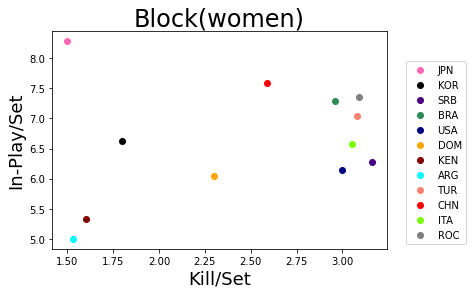

In [215]:
plt.figure(facecolor='white')
for i in range(len(teamstats)):
#     print(i)
    plt.scatter(teamstats.loc[country[i], 'by Set'], teamstats.loc[country[i], 'In-Play by Set'], color=colors[i], label=country[i])
plt.legend(bbox_to_anchor=(1.25,0), loc='lower right')
plt.title('Block({})'.format(sex), fontsize=24)
plt.xlabel('Kill/Set', fontsize=18)
plt.ylabel('In-Play/Set', fontsize=18)
plt.savefig('{}/skill/teamBlock.png'.format(sex), bbox_inches='tight')
plt.show()

In [188]:
sex

'women'

In [161]:
len(teamstats)

12

In [166]:
len(colors)

10

In [171]:
teamstats.index

Index(['ARG', 'BRA', 'CHN', 'DOM', 'ITA', 'JPN', 'KEN', 'KOR', 'ROC', 'SRB',
       'TUR', 'USA'],
      dtype='object', name='Country')